In [1]:
# import all library
import tensorflow as tf
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import numpy as np

# Preparing for the datasets


## Open the file first and visualize the data

In [2]:
from mnist import MNIST

mndata = MNIST(path='dataset',gz=True)
train_img, train_labels = mndata.load_training()
test_img, test_lables = mndata.load_testing()

### Reshape the imgs -> (6000,28,28)

In [3]:
len(train_img[0])

784

In [4]:
len(train_labels)

60000

In [5]:
train_img[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 18,
 18,
 18,
 126,
 136,
 175,
 26,
 166,
 255,
 247,
 127,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 36,
 94,
 154,
 170,
 253,
 253,
 253,
 253,
 253,
 225,
 172,
 253,
 242,
 195,
 64,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 49,
 238,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 251,
 93,
 82,
 82,
 56,
 39,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,

In [6]:
train_img = tf.reshape(train_img,shape=(60000,28,28))
train_img.shape

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-11 13:40:02.645238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-11 13:40:02.645534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


TensorShape([60000, 28, 28])

### Visualize

tf.Tensor(3, shape=(), dtype=int32)


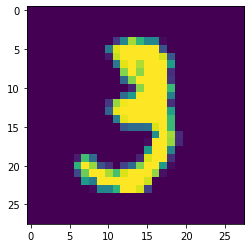

In [12]:
plt.imshow(train_img[10])
print(train_labels[10])

### Reshape All training and testing data

In [13]:
len(test_img)

10000

In [14]:
test_img = tf.reshape(test_img, shape=(10000,28,28))
train_labels = tf.reshape(train_labels,shape=(60000))
test_lables = tf.reshape(test_lables,shape=(10000))

In [10]:
test_img.shape , train_img.shape

(TensorShape([10000, 28, 28]), TensorShape([60000, 28, 28]))

### Change the data type of test and  train data

In [15]:
train_img = tf.cast(train_img,dtype=tf.float32)
train_labels = tf.cast(train_labels,dtype=tf.float32)

test_img = tf.cast(test_img,dtype=tf.float32)
test_lables = tf.cast(test_lables,dtype=tf.float32)

In [16]:
test_img.dtype, train_img.dtype

(tf.float32, tf.float32)

# Let's build the first model!

In [26]:
model1_no_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model1_no_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history_model1 = model1_no_norm.fit(train_img,train_labels,epochs=10)

Epoch 1/10
  24/1875 [..............................] - ETA: 8s - loss: 11.9117 - accuracy: 0.0885 

2022-07-08 14:49:39.620599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 2.2920 - accuracy: 0.1627
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9817 - accuracy: 0.2276
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8050 - accuracy: 0.2887
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6158 - accuracy: 0.3275
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5363 - accuracy: 0.3556
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3313 - accuracy: 0.5104
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0794 - accuracy: 0.6375
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9267 - accuracy: 0.7074
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8563 - accuracy: 0.7379
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8255 - accurac

# Our model is over 0.75 of the accuracy but we have not adopt the feature scaling

In [17]:
np.min(train_img),np.max(train_img)

(0.0, 255.0)

In [18]:
normalized_train = train_img / np.max(train_img)
normalized_test  = test_img / np.max(test_img)

In [19]:
np.min(normalized_train[0]) , np.max(normalized_train)

(0.0, 1.0)

In [37]:
model2_with_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model2_with_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history_model2 = model2_with_norm.fit(normalized_train,train_labels,epochs=10)

Epoch 1/10
  22/1875 [..............................] - ETA: 9s - loss: 2.2928 - accuracy: 0.1151

2022-07-08 14:59:40.000473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.9487 - accuracy: 0.7062
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5357 - accuracy: 0.8539
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4864 - accuracy: 0.8678
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4614 - accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4459 - accuracy: 0.8769
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4353 - accuracy: 0.8798
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4249 - accuracy: 0.8822
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4183 - accuracy: 0.8837
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4125 - accuracy: 0.8848
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4067 - accurac

In [40]:
model2_with_norm.evaluate(normalized_test,test_lables)

313/313 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8846


[0.41326236724853516, 0.884600043296814]

<AxesSubplot:>

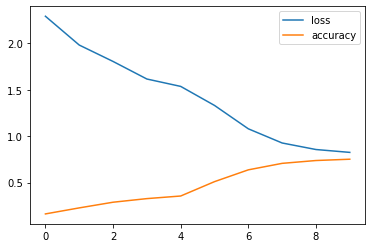

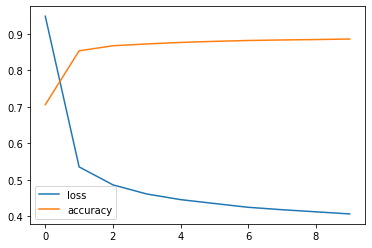

In [41]:
pd.DataFrame(history_model1.history).plot()
pd.DataFrame(history_model2.history).plot()

## Try to improve the model with tweaking the learning rate

In [44]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
lr_sche = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * 10**(epochs/20))

history_model3 = model3.fit(normalized_train,train_labels,epochs=50,callbacks=[lr_sche])

Epoch 1/50
  22/1875 [..............................] - ETA: 9s - loss: 2.3208 - accuracy: 0.0611

2022-07-08 15:19:59.856994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 2.0078 - accuracy: 0.2626 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5007 - accuracy: 0.5286 - lr: 1.1220e-04
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1423 - accuracy: 0.6742 - lr: 1.2589e-04
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9184 - accuracy: 0.7287 - lr: 1.4125e-04
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7722 - accuracy: 0.7730 - lr: 1.5849e-04
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6728 - accuracy: 0.8097 - lr: 1.7783e-04
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6053 - accuracy: 0.8315 - lr: 1.9953e-04
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5625 - accuracy: 0.8440 - lr: 2.2387e-04
Epoch 9/50
1875/1875 [==============================] - 8s 

Text(0, 0.5, 'lr')

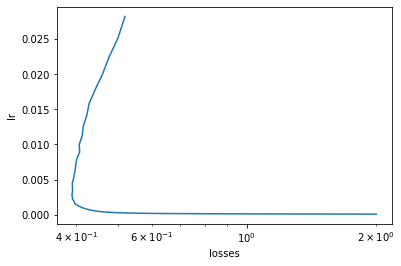

In [47]:
lr = 1e-4* (10**(tf.range(50)/20))
graph = plt.semilogx(history_model3.history['loss'],lr)
plt.xlabel('losses')
plt.ylabel('lr')

#### finding the optimized learning rate

In [49]:
y_values = graph[0].get_ydata()
x_values = graph[0].get_xdata()

index = np.where(x_values == np.min(history_model3.history['loss']))

perfect_lr = y_values[index[0][0]]
perfect_lr.numpy()

0.0028183829312644535

#### Use the optimized learning rate to train the model

In [50]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028183829312644535),
    metrics=['accuracy']
)

history_model4 = model4.fit(normalized_train,train_labels,epochs=25)

Epoch 1/25
  21/1875 [..............................] - ETA: 9s - loss: 2.2841 - accuracy: 0.1265 

2022-07-08 15:36:20.163069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.7524 - accuracy: 0.7698
Epoch 2/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4716 - accuracy: 0.8681
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4356 - accuracy: 0.8769
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4131 - accuracy: 0.8824
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3989 - accuracy: 0.8856
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3841 - accuracy: 0.8898
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3735 - accuracy: 0.8913
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3668 - accuracy: 0.8934
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3604 - accuracy: 0.8940
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3555 - accurac

# Evaluate our model with confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
y_prods = model4.predict(test_img)

# convert y_prods to integers
y_preds = y_prods.argmax(axis=1)
cm = confusion_matrix(test_lables, y_preds)

313/313 [==============================] - 1s 2ms/step


In [66]:
cm

array([[965,   0,   2,   1,   3,   0,   1,   1,   7,   0],
       [  0, 368, 201,   1,   0,   0,   0,   0, 564,   1],
       [ 29,   0, 933,   7,   1,   0,   7,   3,  49,   3],
       [ 87,   0,  59, 687,   1,   2,   0,   6, 165,   3],
       [  9,   0,   4,   0, 402,   0,   9,   4, 154, 400],
       [121,   0,   6, 106,   2, 102,  32,   0, 517,   6],
       [ 80,   1,  20,   0,   3,   1, 743,   1, 109,   0],
       [ 30,   0,  72,   4,   5,   0,   0, 818,  25,  74],
       [ 13,   0,   4,   5,   0,   0,   2,   1, 936,  13],
       [ 16,   0,   0,   5,   2,   0,   0,   8,  82, 896]])

<AxesSubplot:title={'center':'Heat Map'}>

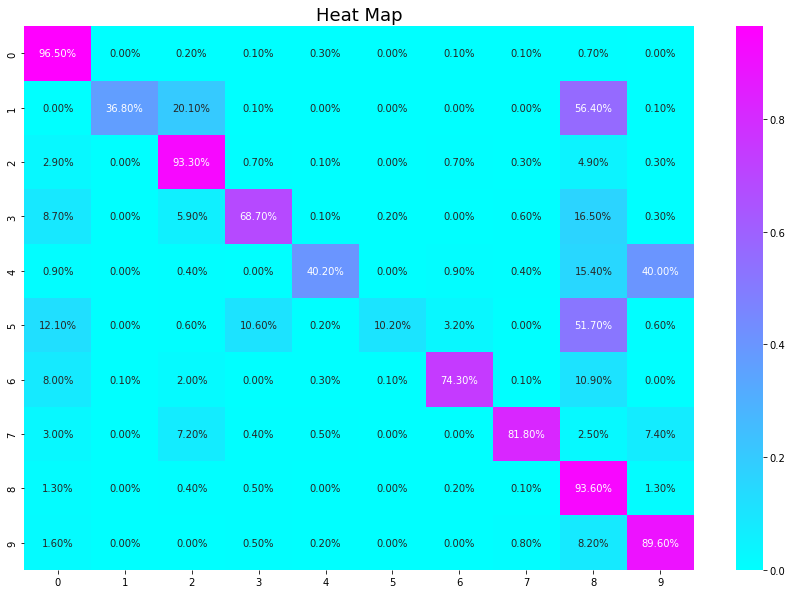

In [67]:
classes = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(15,10))
# Add title to the Heat map
title = "Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

datasets = pd.DataFrame(cm/1000,index=classes, columns=classes)
sns.heatmap(datasets,ax=ax, cmap="cool",fmt=".2%", annot=True)

1/1 [==============================] - 0s 31ms/step


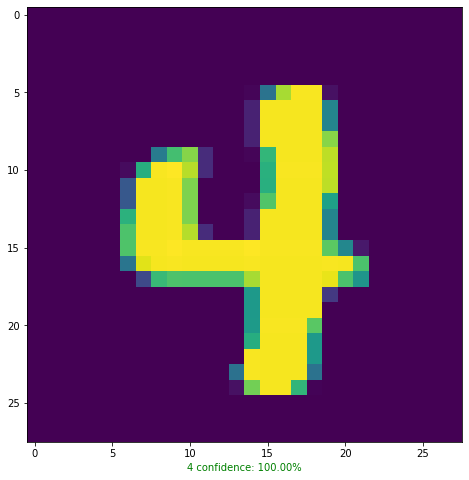

In [36]:
def plt_image_for_test(model=model6):
    import random
    plt.figure(figsize=(8,8))
    selected = random.randint(0,len(test_img))
    actual_label =  classes[tf.cast(test_lables[selected],dtype=tf.int32)]
    plt.imshow(test_img[selected])
    pred_probs = model.predict(tf.reshape(test_img[selected],(1,28,28)))
    pred_label = classes[pred_probs.argmax(axis=1)[0]]
    if actual_label == pred_label:
        plt.xlabel(f"{pred_label} confidence: {pred_probs.max()*100:.2f}%", c='g')
    else:
        plt.xlabel(f"{pred_label} confidence: {pred_probs.max()*100:.2f}% \n True : {actual_label}",c='r')
plt_image_for_test()

# Try to increase the neurons by increasing the accuracy

In [136]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028183829312644535),
    metrics=['accuracy']
)

history_model5 = model5.fit(normalized_train,train_labels,epochs=25)

Epoch 1/25


2022-07-08 16:21:27.597701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.2086 - accuracy: 0.9363
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1033 - accuracy: 0.9683
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9805
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9828
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0545 - accuracy: 0.9833
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9856
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9875
Epoch 9/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0422 - accuracy: 0.9877
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0408 - accurac

## Evaluate the 128 neurons Model

### visualize the history of the Model

<AxesSubplot:title={'center':'accuracy vs losses'}>

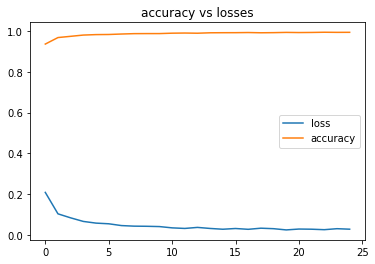

In [138]:
pd.DataFrame(history_model5.history).plot(title="accuracy vs losses")

### Visualize the Confusion Metrix

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:title={'center':'Confusion Matrix of Muti-class mnist prediction'}>

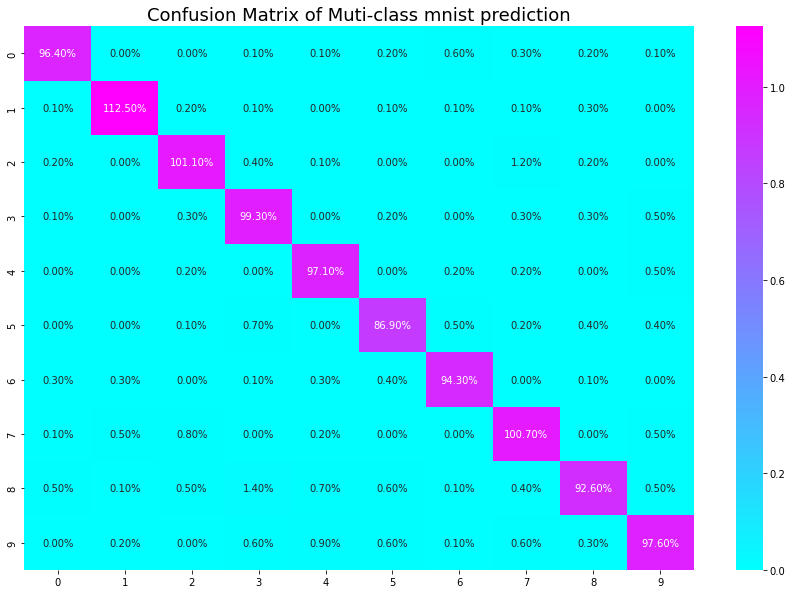

In [41]:
from sklearn.metrics import confusion_matrix
y_prods = model5.predict(test_img)
y_preds = y_prods.argmax(axis=1)

cm = confusion_matrix(test_lables, y_preds)

classes = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(15,10))
# Add title to the Heat map
title = "Confusion Matrix of Muti-class mnist prediction"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

datasets = pd.DataFrame(cm/1000,index=classes, columns=classes)
sns.heatmap(datasets,ax=ax, cmap="cool",fmt=".2%", annot=True)

1/1 [==============================] - 0s 8ms/step


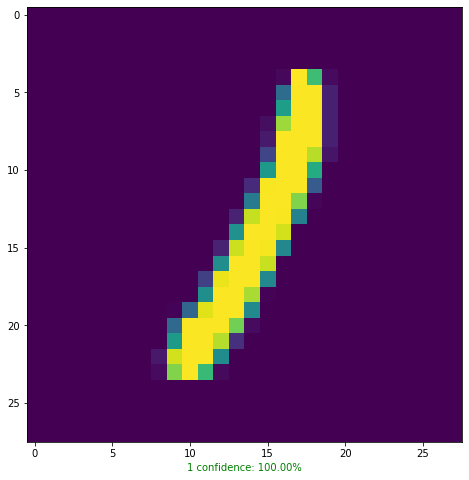

In [181]:
plt_image_for_test(model=model5)

# Building a model with 2000 epochs

In [22]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028183829312644535),
    metrics=['accuracy']
)

limiter = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=20)

history_model6= model6.fit(normalized_train,train_labels,epochs=2000, callbacks=[limiter])

Epoch 1/2000
  17/1875 [..............................] - ETA: 12s - loss: 1.4691 - accuracy: 0.5184

2022-07-11 13:46:59.216103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2066 - accuracy: 0.9366
Epoch 2/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1035 - accuracy: 0.9688
Epoch 3/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0809 - accuracy: 0.9753
Epoch 4/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 5/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9821
Epoch 6/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0543 - accuracy: 0.9839
Epoch 7/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 8/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 9/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0392 - accuracy: 0.9888
Epoch 10/2000
1875/1875 [==============================] - 9s 5ms/step - los

In [23]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model7.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

limiter = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

history_model6= model7.fit(normalized_train,train_labels,epochs=2000, callbacks=[limiter])

Epoch 1/2000
   9/1875 [..............................] - ETA: 12s - loss: 2.1806 - accuracy: 0.2500 

2022-07-11 14:00:52.044456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2303 - accuracy: 0.9315
Epoch 2/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0955 - accuracy: 0.9711
Epoch 3/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0668 - accuracy: 0.9787
Epoch 4/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0527 - accuracy: 0.9829
Epoch 5/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 6/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9891
Epoch 7/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 8/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 9/2000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 10/2000
1875/1875 [==============================] - 9s 5ms/step - los

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:title={'center':'Heat Map of Model 6'}>

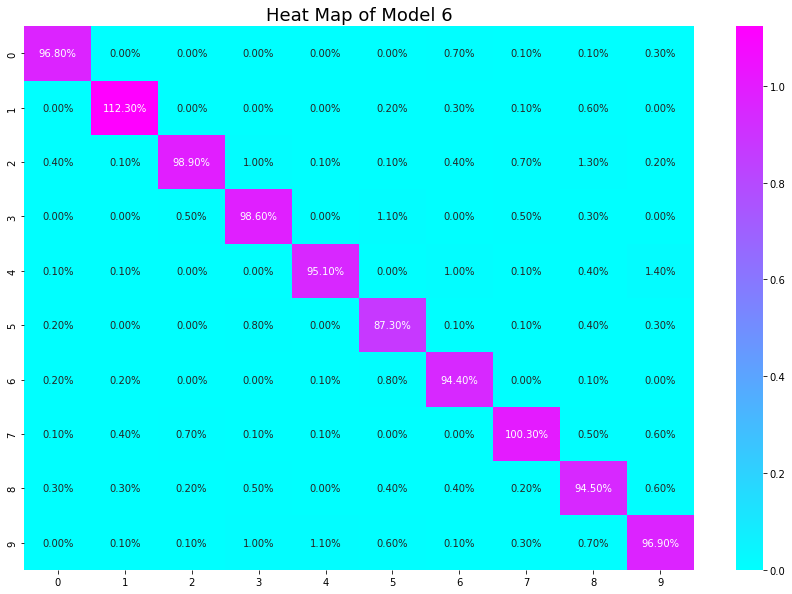

In [29]:
from sklearn.metrics import confusion_matrix
y_prods = model6.predict(normalized_test)
y_preds = y_prods.argmax(axis=1)

cm = confusion_matrix(test_lables, y_preds)

classes = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(15,10))
# Add title to the Heat map
title = "Heat Map of Model 6"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

datasets = pd.DataFrame(cm/1000,index=classes, columns=classes)
sns.heatmap(datasets,ax=ax, cmap="cool",fmt=".2%", annot=True)

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:title={'center':'Heat Map of Model 7'}>

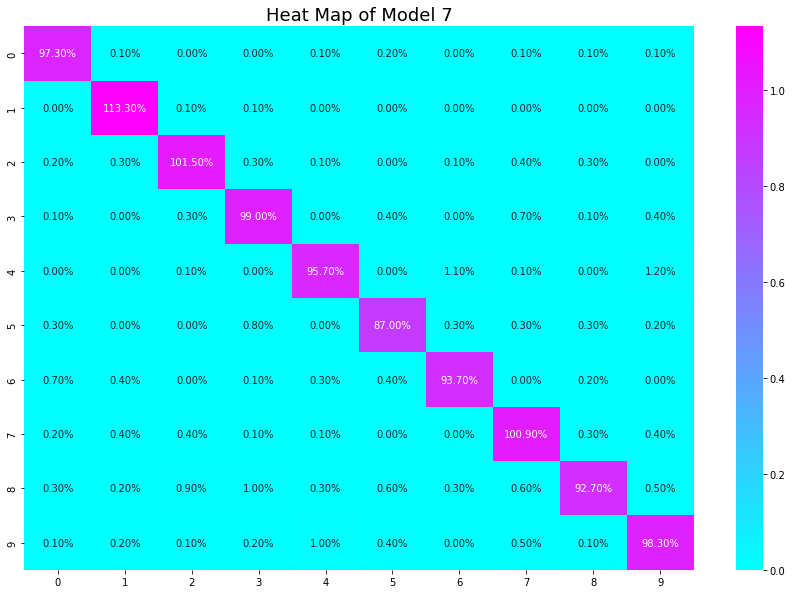

In [31]:
from sklearn.metrics import confusion_matrix
y_prods = model7.predict(normalized_test)
y_preds = y_prods.argmax(axis=1)

cm = confusion_matrix(test_lables, y_preds)

classes = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(15,10))
# Add title to the Heat map
title = "Heat Map of Model 7"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

datasets = pd.DataFrame(cm/1000,index=classes, columns=classes)
sns.heatmap(datasets,ax=ax, cmap="cool",fmt=".2%", annot=True)

In [32]:
model7.evaluate(normalized_test,test_lables)

313/313 [==============================] - 1s 5ms/step - loss: 0.1484 - accuracy: 0.9794


[0.1484130620956421, 0.9794000387191772]

In [33]:
model6.evaluate(normalized_test, test_lables)

 36/313 [==>...........................] - ETA: 1s - loss: 1.1283 - accuracy: 0.9661 

2022-07-11 14:11:24.870148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.8154 - accuracy: 0.9751


[0.8153895735740662, 0.975100040435791]

1/1 [==============================] - 0s 10ms/step


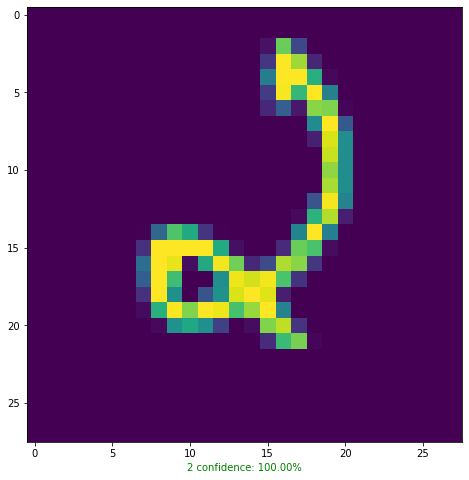

In [37]:
plt_image_for_test(model=model6)

# Summary the model and Save it

In [97]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 5)                 3925      
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [169]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [170]:
model5.save('mode6.h5')

In [98]:
model4.save('mnist.h5')

# Loading saved Model

In [38]:
model5 = tf.keras.models.load_model('./mnist-mode5-99accuracy.h5')

model5.evaluate(normalized_test, test_lables)

 21/313 [=>............................] - ETA: 1s - loss: 0.1765 - accuracy: 0.9762   

2022-07-11 14:16:13.260096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.1962 - accuracy: 0.9792


[0.1961703598499298, 0.9792000651359558]

In [39]:
model5.evaluate(test_img, test_lables)

313/313 [==============================] - 1s 4ms/step - loss: 52.0580 - accuracy: 0.9785


[52.0579833984375, 0.9785000681877136]